In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris=pd.read_csv('iris-data.csv')

In [3]:
iris.head(30)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [4]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [5]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
for i in iris.columns:
    print(iris[i].isna().value_counts())

False    150
Name: sepal_length_cm, dtype: int64
False    150
Name: sepal_width_cm, dtype: int64
False    150
Name: petal_length_cm, dtype: int64
False    145
True       5
Name: petal_width_cm, dtype: int64
False    150
Name: class, dtype: int64


In [7]:
iris.replace('Iris-setossa','Iris-setosa',inplace=True)

In [8]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'versicolor', 'Iris-virginica'],
      dtype=object)

In [9]:
iris.replace('versicolor','Iris-versicolor',inplace=True)

In [10]:
iris.groupby('class').count()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
class,,,,
Iris-setosa,50,50,50,45
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [11]:
iris_fixed=iris.interpolate(inplace=False)

In [12]:
iris_fixed.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.200000,Iris-setosa
1,4.9,3.0,1.4,0.200000,Iris-setosa
2,4.7,3.2,1.3,0.200000,Iris-setosa
3,4.6,3.1,1.5,0.200000,Iris-setosa
4,5.0,3.6,1.4,0.200000,Iris-setosa
5,5.4,3.9,1.7,0.400000,Iris-setosa
6,4.6,3.4,1.4,0.300000,Iris-setosa
7,5.0,3.4,1.5,0.266667,Iris-setosa
8,4.4,2.9,1.4,0.233333,Iris-setosa
9,4.9,3.1,1.5,0.200000,Iris-setosa


In [13]:
iris_fixed.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.478145
sepal_width_cm,0.066091,1.000000,-0.419796,-0.359993
petal_length_cm,0.489083,-0.419796,1.000000,0.961177
petal_width_cm,0.478145,-0.359993,0.961177,1.000000


In [14]:
iris_fixed.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202000
std,1.312781,0.433123,1.764420,0.765447
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


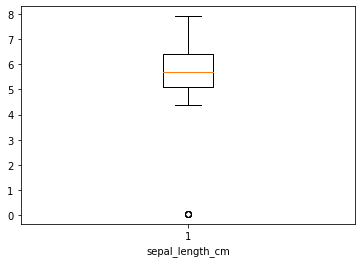

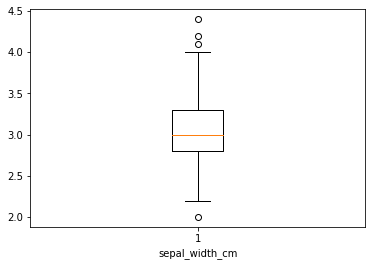

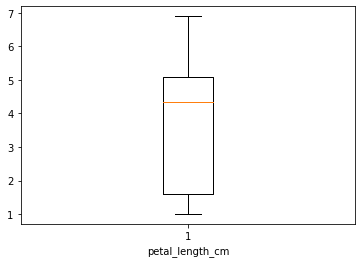

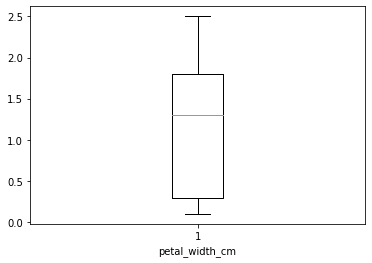

In [15]:
for i in iris_fixed.columns:
    if i != 'class':
        plt.boxplot(iris_fixed[i])
        plt.xlabel(i)
        plt.show()

In [16]:
for i in iris_fixed['class'].unique():
    iris_fixed[i]=0

In [17]:
for i in iris_fixed['class'].unique():
    iris_fixed[i]=iris_fixed['class'].str.contains(i).astype(int)

In [18]:
iris_fixed.drop(columns=['class'],inplace=True)

<BarContainer object of 150 artists>

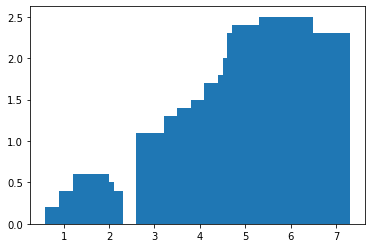

In [19]:
plt.bar(iris_fixed.petal_length_cm,iris_fixed.petal_width_cm)

<BarContainer object of 150 artists>

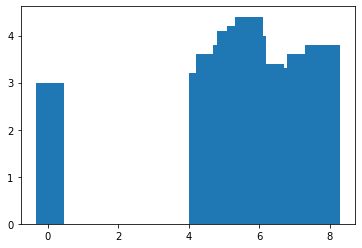

In [20]:
plt.bar(iris_fixed.sepal_length_cm,iris_fixed.sepal_width_cm)

In [21]:
iris_fixed.index[iris_fixed['sepal_length_cm'] <4].tolist()

[77, 78, 79, 80, 81]

In [22]:
iriss=iris_fixed.iloc[[77, 78, 79, 80, 81]].sepal_length_cm.apply(lambda x : x*100 )

In [23]:
iris_fixed.sepal_length_cm.iloc[[77, 78, 79, 80, 81]]=iriss

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
iris_fixed.iloc[[77, 78, 79, 80, 81]]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Iris-setosa,Iris-versicolor,Iris-virginica
77,6.7,3.0,5.0,1.7,0,1,0
78,6.0,2.9,4.5,1.5,0,1,0
79,5.7,2.6,3.5,1.0,0,1,0
80,5.5,2.4,3.8,1.1,0,1,0
81,5.5,2.4,3.7,1.0,0,1,0


In [25]:
iris_fixed.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [26]:
iris_fixed.to_csv('iris_fixed.csv')

<BarContainer object of 150 artists>

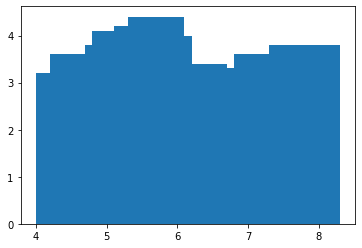

In [27]:
plt.bar(iris_fixed.sepal_length_cm,iris_fixed.sepal_width_cm)